# Логистическая регрессия

### Коптев Данил

## Предсказания в модели логистической регрессии

**Вспомнить из лекции:**
* Как выполняются предсказания в логистической регрессии?
* Что такое сигмоида? Какое ее свойство используется в бинарной классификации?
* Вероятность какого события предсказывается в логистической регрессии?
* Почему логистическая регрессия является частным случаем бинарной классификации?

In [26]:
import numpy as np

х_1 = 3
x_2 = 1
w_0 = -2
w_1 = 1
w_2 = -1 

def b_x_ (): 
  return х_1*w_1 + x_2*w_2 + w_0

def logistic_regression ():
    return 1 / (1 + np.exp(-b_x_()))

logistic_regression()

0.5

Правило прогнозирования метки класса объекта $x$ при значении порога отсечения, равном $p_0$, для модели логистической регрессии выглядит следующим образом:

$$
y = \begin{cases} 1, & \text{если } p(y=1|x) > p_0 \ 0, & \text{если } p(y=1|x) \leq p_0 \end{cases}
$$

где $p(y=1|x)$ - вероятность того, что объект принадлежит классу +1 при данном значении признака $x$. Если вероятность $p(y=1|x)$ больше порога $p_0$, то объект будет отнесен к классу +1, иначе - к классу 0.

Например, если мы установили порог отсечения $p_0 = 0.7$, то объект будет отнесен к классу +1, если вероятность $p(y=1|x)$ больше 0.7, и к классу 0, если меньше или равно 0.7.

**Ваш ответ:**

* Предсказания в логистической регрессии выполняются следующим образом: когда модель обучается на наборе данных, она находит оптимальные значения коэффициентов, которые связывают входные переменные  с выходными значениями. Эти коэффициенты используются для создания линейной комбинации входных переменных, которая затем преобразуется в вероятность принадлежности к классу. Для преобразования используется логистическая функция (сигмоид).

* Сигмоида - это математическая функция, которая используется в логистической регрессии для преобразования линейной комбинации входных переменных в вероятность принадлежности к классу. Функция сигмоиды имеет форму S-образной кривой и имет следующий вид:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
 Свойство сигмоиды, которое используется в бинарной классификации, заключается в том, что она принимает значения только в диапазоне от 0 до 1.

* В логистической регрессии предсказывается вероятность принадлежности объекта к определенному классу.

* Логистическая регрессия является частным случаем бинарной классификации, потому что она используется для разделения объектов на два класса.

### Задача 1
Построить и визуализировать решающее правило логистической регрессии по одному признаку с его весом 2 и свободным членом 0.6 в осях координат: входной признак - вероятность класса +1. 

Указать, для каких $x$ будет предсказан класс +1, для каких - класс 0, если бинаризация выполняется по порогу 0.5 на вероятность класса +1.

#### Ваше решение

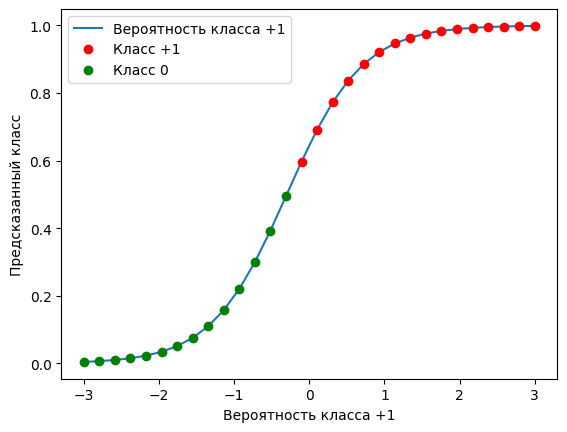

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_regression (x):
    return 1 / (1 + np.exp(-(0.6 + 2*x)))

x = np.linspace(-3, 3, 30)
y = logistic_regression(x)

plt.plot(x, y, label='Вероятность класса +1')
plt.plot(x[y >= 0.5], y[y >= 0.5], 'ro', label='Класс +1')
plt.plot(x[y < 0.5], y[y < 0.5], 'go', label='Класс 0')
plt.xlabel('Вероятность класса +1')
plt.ylabel('Предсказанный класс')
plt.legend()
plt.show()

### Задача 2
В бинарных классификаторах можно использовать разные пороги бинаризации $T$: классификатор $a(x) = sign(\langle w, x\rangle +w_0 - T)$ возвращает класс +1, если выражение $\langle w, x\rangle +w_0$ больше $T$, и -1, если выражение меньше $T$. Аналогично можно менять пороги $P$ в логистической регрессии: если вероятность класса +1 больше порога $P$, предсказывается класс +1, если меньше - класс -1. Как связаны пороги $T$ и $P$?

#### Ваше решение

Для линейного классификатора с порогом $T$ функция принятия решения имеет вид:

$$a(x) = sign(\langle w, x\rangle +w_0 - T)$$

Для логистической регрессии с порогом $P$ функция принятия решения имеет вид:

$$a(x) = sign(\sigma(\langle w, x\rangle +w_0 - P))$$

Обе функции принятия решения можно переписать в более общем виде:

$$a(x) = sign(f(x) - \theta)$$

где $f(x) = \langle w, x\rangle +w_0$ - линейная комбинация признаков, $\sigma(\langle w, x\rangle +w_0)$ - логистическая функция, $\theta = T$ для линейного классификатора и $\theta = -\ln(\frac{1}{P}-1)$ для логистической регрессии.

Таким образом, связь между порогами $T$ и $P$ можно выразить следующим образом:

$$T =  \ln\left(\frac{1}{P}-1\right)$$

$$P = \frac{1}{1+e^{-\left(f(x) - T\right)}}$$

## Обучение бинарной линейной классификации и логистической регрессии

**Вспомнить из лекции:**
* Как обучаются бинарные линейные классификаторы? Что такое верхняя оценка на пороговую функцию потерь? Для чего верхние оценки используются? Какие верхние оценки часто используют?
* Как обучается логистическая регрессия? Какой функционал качества в ней оптимизируют? Как он связан с логистической функцией потерь?
* Каким методом в бинарной линейной классификации решают оптимизационную задачу? Можно ли найти оптимальные веса аналитически, как в линейной регрессии?

**Ваш ответ:**
* (1) Бинарные линейные классификаторы и логистическая регрессия обучаются с помощью метода максимального правдоподобия. Этот метод заключается в максимизации вероятности правильной классификации обучающих объектов.
(2) Верхняя оценка на пороговую функцию потерь - это дифференцируемая функция, которая сверху оценивает пороговую функцию потерь. (3) Она используется вместо пороговой функции потерь при обучении бинарных линейных классификаторов. (4) Верхние оценки, которые часто используются : L1 и L2 регуляризация, Hinge Loss и Log Loss.

* (1) Логистическая регрессия обучается путем минимизации функционала качества на обучающей выборке. (2) Функционал качества в логистической регрессии оптимизирует логистическую функцию потерь и регуляризацию весов. (3) Логистическая функция потерь определяется как сумма логарифмических потерь для каждого объекта обучающей выборки.

* (1) В бинарной линейной классификации для решения оптимизационной задачи обычно используют метод градиентного спуска или его модификации.
(2) В отличие от линейной регрессии, в бинарной линейной классификации нельзя найти оптимальные веса аналитически, так как функция потерь имеет несколько локальных минимумов и не является выпуклой.

### Задача 3

Предположим, что на определенной обучающей выборке два класса можно линейно разделить в признаковом пространстве. В этом случае оптимальные веса логистической регрессии будут бесконечными. Почему?

#### Ваше решение

Если два класса можно линейно разделить в признаковом пространстве, то логистическая функция потерь будет равна нулю для всех объектов обучающей выборки, так как каждый объект будет правильно классифицирован. При минимизации функционала качества, который включает логистическую функцию потерь и регуляризацию весов, оптимальные веса будут стремиться к бесконечности, так как логистическая функция потерь будет равна нулю, а регуляризационная часть функционала будет стараться минимизировать веса. Таким образом, оптимальные веса логистической регрессии будут бесконечными в этом случае.


### Задача 4
Выведите логистическую функцию потерь на основе метода максимального правдоподобия для обучения логистической регрессии.


#### Ваше решение

$$L(w) = -\sum_{i=1}^{n} y_i \ln \sigma(\langle w, x_i \rangle) + (1-y_i) \ln (1-\sigma(\langle w, x_i \rangle))$$

где $w$ - вектор весов модели, $x_i$ - вектор признаков $i$-го объекта, $y_i$ - метка класса $i$-го объекта (0 или 1), $\sigma = \frac{1}{1+e^{-z}}$ - сигмоидная функция.

## Практическое задание
### Решение задачи кредитного скоринга

В рамках задания используются [данные клиентов банка](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)) (задача кредитного скоринга). В учебных целях (для сокращения времени на обработку) данные были несколько преобразованы. Преобразованные данные - в файле *scoring.csv*

Описание признаков и  их значения:
* *account*: банковский счет (-1: отрицательный баланс, 0: нет счета, 1: до 200 ед., 2: более 200 ед)
* *duration*: на какой период запрашивают кредит
* *credit_history*: рейтинг по кредитной истории (по шкале от 0 до 4, где 0 - отличная кредитная история, 4 - критическая ситуация с кредитами)
* *amount*: на какую сумму запрашивают кредит
* *savings*: сберегательный счет (0: нет, 1: $\ldots<100$, 2: $100\leq\ldots<500$, 3: $500\leq\ldots<1000$, 4:  $\ldots\geq1000$)
* *employment*: срок работы на текущей позиции (0: не работает, 1: до 1 года, 2: от 1 до 4 лет, 3: от 4 до 7 лет, 4: более 7 лет)
* *guarantors*: есть ли поручители (1 - есть поручители, 0 - нет)
* *residence*:  сколько лет резидент
* *age*: возраст, деленный на 100
* *credits_number*: число кредитов
* *job*: работа (0: не работает, 1: неквалифицированный, 2: квалифицированный специалист, 3: высокая должность или бизнес)
* *maintenance_people*: число людей, которых обеспечивает заемщик
* *telephone*: указан ли телефон (1: да, 0: нет)
* *foreign*: есть ли иностранное гражданство (1: иностранец, 0: нет)
* *real_estate*: наличие недвижимости (1: есть недвижимость, 0: нет недвижимости)
* *life_insurance*: наличие полиса страхования жизни (1: оформлено страхование жизни, 0: нет страховки)
* *car*: наличие автомобиля (1: есть автомобиль, 0: нет автомобиля)
* *housing_rent*: траты на съем жилья (1: платит за съем жилья, 0: не платит за съем жилья)
* *sex*: пол (1: мужчина, 0: женщина)
* *purpose*: на какую цель запрашивают кредит (из нескольких вариантов)
* *target*: решение о выдаче кредита (1: кредит выдан, 0: в кредите отказано)

Требуется решить задачу предсказания значения в последнем столбце, то есть задачу бинарной классификации.

По описанию данных понятно, что все признаки числовые (включая вещественные, порядковые, бинарные), кроме предпоследнего, который является категориальным.

### Задание 1
##### Предварительный этап - загрузка и знакомство с данными
1. Импортируйте данные из файла *scoring.csv* и выведите несколько записей для контроля корректности импорта. Изучите данные.
2. Выведите размерность набора данных.
3. Выведите типы столбцов полученного *DataFrame* (атрибут *dtypes* объекта *DataFrame*).
4. Выведите количество объектов класса 0 и класса 1. Оцените сбалансированность классов.


In [ ]:
import pandas as pd
# 1
dataAll = pd.read_csv('scoring.csv', sep = ';')
dataAll.head()


,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,...,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex,purpose,target
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,...,1,0,1,0,0,1,0,1,business,1
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,...,1,1,1,0,1,0,0,1,business,1
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,...,1,0,1,0,1,0,1,1,retraining,0
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,...,1,0,1,0,0,1,0,1,business,1
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,...,1,1,1,0,0,0,0,1,education,0


In [ ]:
# 2
dataAll.shape


(600, 21)

In [ ]:
# 3
dataAll.dtypes


account                 int64
duration              float64
credit_history          int64
amount                float64
savings                 int64
employment              int64
guarantors              int64
residence               int64
age                   float64
credits_number          int64
job                     int64
maintenance_people      int64
telephone               int64
foreign                 int64
real_estate             int64
life_insurance          int64
car                     int64
housing_rent            int64
sex                     int64
purpose                object
target                  int64
dtype: object

In [ ]:
# 4
dataAll['target'].value_counts()

1    300
0    300
Name: target, dtype: int64

**Оценак сбалансированности классов:** по 300, следовательно сбалансированно

### Задание 2
##### Первый этап - попытка построения модели с использованием только числовых признаков (без учета категориального признака)
1. Удалите из $X$ столбцы с категориальными признаками.
2. Выведите несколько строк для контроля. 
3. Выведите размерность полученной матрицы.

In [ ]:
# 1
data = dataAll.drop(['purpose'], axis = 1)

In [ ]:
# 2
data.head()

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,job,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex,target
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,2,1,0,1,0,0,1,0,1,1
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,2,1,1,1,0,1,0,0,1,1
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,2,1,0,1,0,1,0,1,1,0
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,2,1,0,1,0,0,1,0,1,1
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,2,1,1,1,0,0,0,0,1,0


In [ ]:
# 3
data.shape

(600, 20)

4. Выполните разделение набора на обучающие и тестовые данные в соотношении 70/30, установив значение параметра *random_state* (произвольно). Задайте перемешивание записей перед разделением.   
Вопрос (подумать): для чего это нужно?
5. Выведите размерности обучающего и тестового набора.
6. Выведите соотношение объектов классов 1 и 0 в обучающем и тестовом наборе. Проконтролируйте сбалансированность классов.

In [ ]:
from sklearn.model_selection import train_test_split

x = data.drop('target', axis=1)
y = data['target']

# 4
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.7, random_state=25, shuffle=True)

In [ ]:
# 5
print("Размер обучающей выборки:", x_train.shape)
print("Размер тестовой выборки:", x_test.shape)

Размер обучающей выборки: (420, 19)
Размер тестовой выборки: (180, 19)


In [ ]:
# 6
print("Соотношение классов в обучающей выборке:")
print(y_train.value_counts(normalize=True))
print("Соотношение классов в тестовой выборке:")
print(y_test.value_counts(normalize=True))

Соотношение классов в обучающей выборке:
1    0.511905
0    0.488095
Name: target, dtype: float64
Соотношение классов в тестовой выборке:
0    0.527778
1    0.472222
Name: target, dtype: float64


**Ответ на вопрос  подумать:** перемешивание записей перед разделением позволяет случайным образом распределить объекты между обучающей и тестовой выборками, что уменьшает вероятность попадания похожих объектов в одну выборку и повышает качество модели

7. Выполните масштабирование (метод - стандартизация) данных: обучите обработчик на обучающей выборке и примените его к тестовым данным.

In [ ]:
from sklearn.preprocessing import StandardScaler

# 7
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

8. Создайте и обучите модель логистической регрессии с настройками по умолчанию.
9. Получите предсказания модели (прогнозируемые метки классов) для объектов обучающей и тестовой выборки.
10. Оцените качество обученного классификатора на обучающей и тестовой выборке с помощью метрики accuracy.
11. Выведите прогнозируемые моделью вероятности и оцените степень уверенности классификатора в прогнозируемых им метках классов.
12. Постройте ROC-кривые для обучающей и тестовой выборки. Оцените качество прогноза вероятности принадлежности классу.
13. Проанализируйте все полученные результаты, сделайте выводы.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

# 8
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [ ]:
# 9
y_train_pred = model.predict(x_train_scaled)
y_test_pred = model.predict(x_test_scaled)

In [ ]:
# 10
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Точность на обучающей выборке:", train_accuracy)
print("Точность на тестовой выборке:", test_accuracy, "\n") 

Точность на обучающей выборке: 0.6976190476190476
Точность на тестовой выборке: 0.6666666666666666 



In [ ]:
# 11
y_train_prob = model.predict_proba(x_train_scaled)[:, 1]
y_test_prob = model.predict_proba(x_test_scaled)[:, 1]
print("Прогнозируемые вероятности на обучающей выборке:", y_train_prob)
print("Прогнозируемые вероятности на тестовой выборке:", y_test_prob, "\n")

Прогнозируемые вероятности на обучающей выборке: [0.50319168 0.54560239 0.59358606 0.56438657 0.34294839 0.3172091
 0.71629159 0.27014971 0.40072371 0.49335858 0.58237568 0.3683404
 0.8119222  0.78383676 0.24762486 0.50669453 0.42898226 0.63450464
 0.71477043 0.2658871  0.08909498 0.64008161 0.45456258 0.37694796
 0.40745286 0.34475252 0.7419933  0.46459591 0.84614413 0.47789388
 0.68114312 0.66038654 0.51433737 0.49568817 0.55135828 0.7623285
 0.11954533 0.48903085 0.22001167 0.30388106 0.27463942 0.7781429
 0.65623968 0.26655612 0.66550699 0.65872129 0.3034342  0.66169043
 0.80850475 0.64625212 0.75774717 0.96671044 0.61992933 0.17172072
 0.18869259 0.51474761 0.62192447 0.08682221 0.39755627 0.33392017
 0.75451826 0.44412813 0.55415021 0.07113701 0.60822213 0.78742106
 0.81177171 0.86684463 0.84920806 0.6545094  0.47038166 0.57239855
 0.72253473 0.79624952 0.34388033 0.72359365 0.17822355 0.8475258
 0.45131712 0.62051016 0.30458575 0.33924965 0.33600558 0.34405324
 0.78222481 0.6037

In [ ]:
# 12
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)
print("AUC на обучающей выборке:", train_auc)
print("AUC на тестовой выборке:", test_auc, "\n")

AUC на обучающей выборке: 0.758184912081679
AUC на тестовой выборке: 0.6958513931888545 



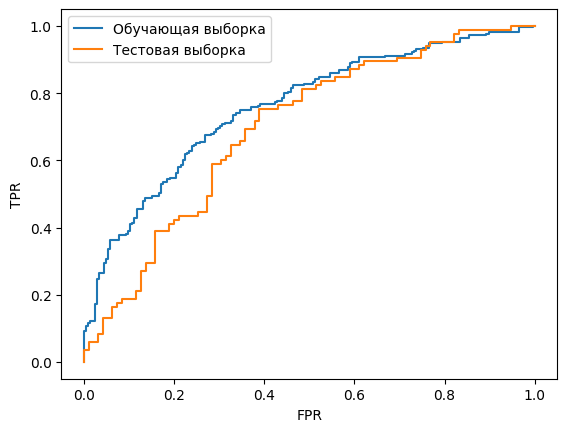

In [ ]:
# 13
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)
plt.plot(train_fpr, train_tpr, label="Обучающая выборка")
plt.plot(test_fpr, test_tpr, label="Тестовая выборка")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

**Анализ:** В результате было получено значение AUC на обучающей выборке равное 0.758, а на тестовой выборке - 0.696. Это говорит о том, что модель имеет неплохое качество прогноза, но есть некоторое переобучение на обучающей выборке.

Таким образом, модель логистической регрессии является достаточно эффективным инструментом для решения задачи бинарной классификации, но требует дополнительных улучшений для достижения более высокого качества прогноза.

### Значимость и веса признаков

Большинство алгоритмов умеют так или иначе оценивать значимость признаков. 

В линейных моделях веса признаков можно рассматривать в качестве оценки значимостей этих признаков (**только при условии, что данные были масштабированы!**). 

### Задание 3
1. Выведите веса полученной модели. Вывод оформите в виде таблицы: первый столбец - имя признака, второй столбец - вес; отсортируйте таблицу по увеличению веса.
2. Проанализируйте и интерпретируйте (постарайтесь объяснить) полученные результаты.


In [ ]:
weights = pd.DataFrame({'feature': x.columns, 'weight': model.coef_[0]})
weights = weights.sort_values(by='weight')
print(weights)

               feature    weight
13             foreign -0.334632
1             duration -0.317196
17        housing_rent -0.212450
9       credits_number -0.181296
11  maintenance_people -0.161067
3               amount -0.116581
10                 job -0.074693
6           guarantors -0.074045
12           telephone  0.025527
7            residence  0.061290
8                  age  0.063422
15      life_insurance  0.151767
4              savings  0.192437
18                 sex  0.205914
0              account  0.207908
5           employment  0.286314
16                 car  0.407007
14         real_estate  0.442485
2       credit_history  0.462479


**Анализ:** из таблицы видно, что наибольший вес имеют признаки real_estate, car и account, что может указывать на то, что наличие недвижимости, автомобиля и банковского счета положительно влияет на решение о выдаче кредита. Наименьший вес имеют признаки foreign, duration и housing_rent, что может указывать на то, что наличие иностранного гражданства, длительность запрашиваемого кредита и траты на съем жилья отрицательно влияют на решение о выдаче кредита. Остальные признаки имеют средние веса и могут вносить как положительный, так и отрицательный вклад в решение о выдаче кредита.

### Задание 4
##### Второй этап - учет категориального признака
1. Вернитесь к датафрейму, полученному в результате импорта данных (содержащему все признаки). Выполните бинарное кодирование (*one-hot-encoding*) категориального признака для включения его в модель. Можно использовать функцию `pd.get_dummies()`.
2. Выведите несколько строк полученного датафрейма. Изучите результаты кодирования категориальных значений.

In [ ]:
data_categorical = pd.get_dummies(dataAll, columns=['purpose'])
data_categorical.head()

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,...,purpose_business,purpose_car_new,purpose_car_used,purpose_domestic_appliances,purpose_education,purpose_furniture,purpose_others,purpose_repairs,purpose_retraining,purpose_television
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,...,1,0,0,0,0,0,0,0,0,0
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,...,1,0,0,0,0,0,0,0,0,0
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,...,0,0,0,0,0,0,0,0,1,0
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,...,1,0,0,0,0,0,0,0,0,0
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,...,0,0,0,0,1,0,0,0,0,0


3. Повторите все основные шаги построения модели классификации, выполнявшиеся ранее без учета категориального признака. При разделении набора на обучающие и тестовые данные используйте то же самое значение *random_state*, которое было задано при построении предыдущей модели.
4. Выполните оценку качества обученной модели. Сравните с оценкой качества модели, построенной без учета категориального признака.
5. Сделайте выводы.


In [ ]:
from sklearn.model_selection import train_test_split

x = data_categorical.drop('target', axis=1)
y = data_categorical['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_train_pred = model.predict(x_train_scaled)
y_test_pred = model.predict(x_test_scaled)

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Точность на обучающей выборке:", train_accuracy)
print("Точность на тестовой выборке:", test_accuracy)

Точность на обучающей выборке: 0.7261904761904762
Точность на тестовой выборке: 0.6555555555555556


In [ ]:
y_train_prob = model.predict_proba(x_train_scaled)[:, 1]
y_test_prob = model.predict_proba(x_test_scaled)[:, 1]
print("Прогнозируемые вероятности на обучающей выборке:", y_train_prob)
print("Прогнозируемые вероятности на тестовой выборке:", y_test_prob)

Прогнозируемые вероятности на обучающей выборке: [0.75084779 0.48777909 0.16486289 0.41868694 0.62842778 0.11807871
 0.63084638 0.20359537 0.46929276 0.53670296 0.85575862 0.56061627
 0.90465521 0.35970902 0.26855028 0.19776059 0.38161365 0.39295036
 0.48182575 0.18427641 0.45828942 0.30868997 0.74123169 0.31239254
 0.53642202 0.28750497 0.95784933 0.12647411 0.3802673  0.31439991
 0.22544708 0.70377362 0.57493911 0.64900709 0.22559903 0.69078951
 0.68388538 0.34446002 0.27201131 0.47695131 0.76078691 0.38109952
 0.55787904 0.47351084 0.37784109 0.81311089 0.17408749 0.2782481
 0.18588706 0.52602843 0.68070846 0.39854716 0.55977648 0.77188591
 0.82231132 0.34443292 0.51876863 0.78160856 0.78456618 0.57282701
 0.45097572 0.69595917 0.75197096 0.34414197 0.06912137 0.58040201
 0.83291329 0.20222068 0.61146093 0.79694586 0.06799736 0.64887897
 0.52054035 0.2319759  0.1670306  0.13120975 0.19300972 0.18793573
 0.63238634 0.82768725 0.44604231 0.73003795 0.33769495 0.30761174
 0.18783864 0.

In [ ]:
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)
print("AUC на обучающей выборке:", train_auc)
print("AUC на тестовой выборке:", test_auc)

AUC на обучающей выборке: 0.780998389694042
AUC на тестовой выборке: 0.7121493016932394


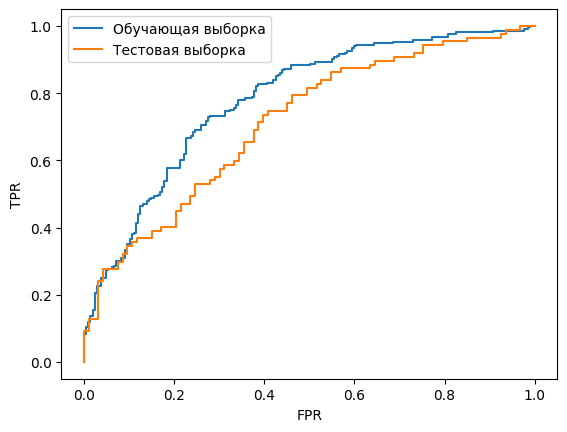

In [ ]:
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)
plt.plot(train_fpr, train_tpr, label="Обучающая выборка")
plt.plot(test_fpr, test_tpr, label="Тестовая выборка")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

**Вывод:** При использовании категориального признака качество модели улучшилось на обучающей выборке, так и на тестовой выборке. Модель показывает хорошие результаты на обучающей выборке, но немного хуже на тестовой выборке. Это может свидетельствовать о переобучении модели на обучающей выборке. Необходимо провести дополнительный анализ и оптимизацию параметров модели для улучшения ее качества на тестовой выборке.

### Задание 5
##### Эксперимент (в учебных целях). 
Вместо бинарного кодирования категориального признака - просто нумерация категорий.
1. Вернитесь к датафрейму, полученному в результате импорта данных (содержащему все признаки), и просто замените категории номерами. Для этого можно использовать обработчик *LabelEncoder* из модуля *sklearn.preprocessing*.
2. Повторите все основные шаги построения модели классификации, выполнявшиеся ранее. При разделении набора на обучающие и тестовые данные используйте то же самое значение *random_state*, которое было задано при построении предыдущих моделей.
3. Выполните оценку качества обученной модели. Сравните с оценкой качества построенных ранее моделей.
4. Сделайте выводы.


In [ ]:
from sklearn.preprocessing import LabelEncoder

data_encoded = dataAll.copy()
le = LabelEncoder()
data_encoded['purpose'] = le.fit_transform(data_encoded['purpose'])
data_encoded.head()

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,...,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex,purpose,target
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,...,1,0,1,0,0,1,0,1,0,1
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,...,1,1,1,0,1,0,0,1,0,1
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,...,1,0,1,0,1,0,1,1,8,0
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,...,1,0,1,0,0,1,0,1,0,1
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,...,1,1,1,0,0,0,0,1,4,0


In [ ]:
x = data_encoded.drop('target', axis=1)
y = data_encoded['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_train_pred = model.predict(x_train_scaled)
y_test_pred = model.predict(x_test_scaled)

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Точность на обучающей выборке:", train_accuracy)
print("Точность на тестовой выборке:", test_accuracy)

Точность на обучающей выборке: 0.7119047619047619
Точность на тестовой выборке: 0.6277777777777778


In [ ]:
y_train_prob = model.predict_proba(x_train_scaled)[:, 1]
y_test_prob = model.predict_proba(x_test_scaled)[:, 1]
print("Прогнозируемые вероятности на обучающей выборке:", y_train_prob)
print("Прогнозируемые вероятности на тестовой выборке:", y_test_prob)

Прогнозируемые вероятности на обучающей выборке: [0.80388984 0.40010614 0.24418669 0.26573329 0.32178146 0.22955267
 0.55852897 0.24498385 0.72389592 0.71009493 0.60522578 0.65067797
 0.88360232 0.55134279 0.27984058 0.29758806 0.52404817 0.38104608
 0.55382068 0.31603743 0.4577306  0.24497181 0.63719778 0.40185346
 0.4879758  0.10195427 0.85057303 0.22157282 0.40225752 0.34577837
 0.18463208 0.77991541 0.63146566 0.7448343  0.22351545 0.77424903
 0.69903942 0.46333209 0.25703181 0.46057074 0.71785531 0.45364238
 0.48775841 0.53645992 0.45592778 0.82205096 0.17844836 0.42040643
 0.380716   0.50080864 0.39439144 0.49033274 0.22183248 0.45304168
 0.58178534 0.45929389 0.52250576 0.71448132 0.71018116 0.57410712
 0.47655157 0.77505955 0.77704329 0.34973836 0.11259819 0.52235103
 0.55619445 0.20631767 0.32694895 0.72962696 0.11466365 0.74595377
 0.48138278 0.35080178 0.23951313 0.25497338 0.25538466 0.0601647
 0.63006366 0.6326425  0.26113301 0.80433682 0.36281181 0.31251451
 0.36830692 0.

In [ ]:
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)
print("AUC на обучающей выборке:", train_auc)
print("AUC на тестовой выборке:", test_auc)

AUC на обучающей выборке: 0.7521716450069175
AUC на тестовой выборке: 0.6981831664812754


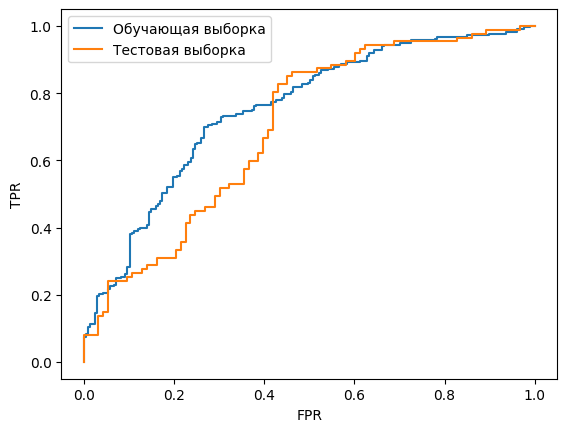

In [ ]:
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)
plt.plot(train_fpr, train_tpr, label="Обучающая выборка")
plt.plot(test_fpr, test_tpr, label="Тестовая выборка")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

**Вывод:** При использовании простой нумерации категорий вместо бинарного кодирования качество модели ухудшилось. Нумерация категорий не учитывает возможные зависимости между категориями, а при бинарном кодировании каждая категория представлена отдельным признаком, что позволяет учесть эти зависимости

### Дополнительное задание (по желанию)
Задание  на дополнительные баллы - в зависимости от количества и качества проделанной работы.
1. Проанализируйте возможности повышения качества модели (за счет более качественной подготовки признаков, за счет подбора гиперпараметров модели и т.п.).
2. Реализуйте сформулированные предположения и попытайтесь получить модель с хорошей предсказательной способностью.


Для повышения качества модели можно предпринять следующие шаги:

* Провести анализ и предобработку данных. Например, проверить наличие пропущенных значений, выбросов, корреляции между признаками, а также провести масштабирование признаков

* Подобрать оптимальные гиперпараметры модели

* Провести отбор признаков, чтобы уменьшить размерность данных и улучшить качество модели

In [ ]:
data = pd.get_dummies(dataAll, columns=['purpose'])
data.head()

data.isnull().sum()

account                        0
duration                       0
credit_history                 0
amount                         0
savings                        0
employment                     0
guarantors                     0
residence                      0
age                            0
credits_number                 0
job                            0
maintenance_people             0
telephone                      0
foreign                        0
real_estate                    0
life_insurance                 0
car                            0
housing_rent                   0
sex                            0
target                         0
purpose_business               0
purpose_car_new                0
purpose_car_used               0
purpose_domestic_appliances    0
purpose_education              0
purpose_furniture              0
purpose_others                 0
purpose_repairs                0
purpose_retraining             0
purpose_television             0
dtype: int

In [ ]:
# нахождение индексов параметров, которые сильно коррелируют между собой и удаление параметров, которые сильно коррелируют между собой
corr_matrix = data.drop('target', axis=1).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.2)]
data = data.drop(to_drop, axis=1)
data

<ipython-input-398-c9b899bb084b>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,account,duration,credit_history,savings,employment,guarantors,maintenance_people,foreign,target,purpose_business,purpose_domestic_appliances,purpose_education,purpose_repairs,purpose_retraining
0,1,0.18,2,2,2,1,1,1,1,1,0,0,0,0
1,-1,0.18,0,1,3,1,1,1,1,1,0,0,0,0
2,-1,0.12,2,1,3,1,1,1,0,0,0,0,0,1
3,-1,0.30,0,0,1,1,1,1,1,1,0,0,0,0
4,0,0.36,2,1,2,1,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1,0.09,2,1,2,1,1,1,1,0,0,0,0,0
596,0,0.48,2,1,0,1,1,1,0,1,0,0,0,0
597,1,0.24,3,0,2,1,1,1,1,0,0,0,0,0
598,0,0.18,1,1,4,1,2,1,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.3, random_state=25)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model_lr = LogisticRegression()
grid_search_lr = GridSearchCV(
    model_lr, 
    {'C': np.linspace(0.001, 10, 20)}, 
    cv=5, 
    scoring='accuracy')
grid_search_lr.fit(x_train_scaled, y_train)
best_params_lr = grid_search_lr.best_params_

model = LogisticRegression(**best_params_lr)
model.fit(x_train_scaled, y_train)
model

LogisticRegression(C=1.0535263157894736)

In [ ]:
y_train_pred = model.predict(x_train_scaled)
y_test_pred = model.predict(x_test_scaled)

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Точность на обучающей выборке:", train_accuracy)
print("Точность на тестовой выборке:", test_accuracy, "\n") 

Точность на обучающей выборке: 0.6571428571428571
Точность на тестовой выборке: 0.6666666666666666 



In [ ]:
y_train_prob = model.predict_proba(x_train_scaled)[:, 1]
y_test_prob = model.predict_proba(x_test_scaled)[:, 1]
print("Прогнозируемые вероятности на обучающей выборке:", y_train_prob)
print("Прогнозируемые вероятности на тестовой выборке:", y_test_prob, "\n")

Прогнозируемые вероятности на обучающей выборке: [0.47686017 0.48752567 0.53274537 0.52833652 0.34426078 0.41636153
 0.81991915 0.41251659 0.4935421  0.52857016 0.41636153 0.53383027
 0.73044779 0.80340067 0.32675127 0.58564244 0.26172065 0.53923379
 0.53628902 0.4314963  0.09459488 0.7569551  0.48861477 0.51729068
 0.54387028 0.45720931 0.71355569 0.40138281 0.88491087 0.34203156
 0.56450992 0.72941202 0.64928777 0.63971648 0.64268735 0.7539638
 0.23433228 0.5548186  0.30954103 0.36775996 0.31853996 0.64570808
 0.73102413 0.35411808 0.61300561 0.62232453 0.23061797 0.67239319
 0.74330799 0.72808413 0.72540619 0.93915751 0.6446736  0.13646091
 0.25672603 0.7272203  0.41742115 0.13594807 0.37213766 0.26162805
 0.60416773 0.31853996 0.53274537 0.2474736  0.43363611 0.75890952
 0.72894624 0.74247542 0.72740626 0.61797648 0.26415282 0.41784543
 0.7019513  0.77698506 0.28328518 0.75890952 0.1551625  0.69883391
 0.60786841 0.61815509 0.30068415 0.39978092 0.30812688 0.5300102
 0.7113238  0.4

In [ ]:
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)
print("AUC на обучающей выборке:", train_auc)
print("AUC на тестовой выборке:", test_auc, "\n")

AUC на обучающей выборке: 0.7306976744186046
AUC на тестовой выборке: 0.7056346749226006 



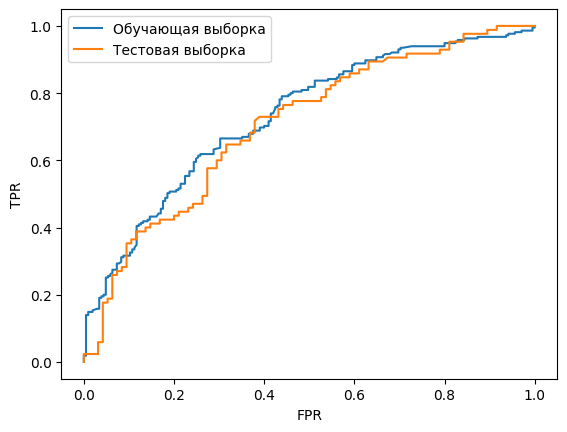

In [ ]:
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)
plt.plot(train_fpr, train_tpr, label="Обучающая выборка")
plt.plot(test_fpr, test_tpr, label="Тестовая выборка")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

Модель показывает хорошие результаты на обучающей выборке, но немного хуже на тестовой выборке. Это может свидетельствовать о переобучении модели на обучающей выборке, поэтому необходимо провести дополнительный анализ и оптимизацию модели для улучшения ее результатов на тестовой выборке, например использовать не логистическую регрессию и поработать с данными, например убрать сильно коррелирующие друг с другом параметры